<a href="https://colab.research.google.com/github/Josh0527/Uber-Stcok-Prediction-Model/blob/main/Stock_Prediction_Model_(Uber).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import .csv file

import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/world-stock-prices-daily-updating")

print("Path to dataset files:", path)

100%|██████████| 11.8M/11.8M [00:00<00:00, 79.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nelgiriyewithana/world-stock-prices-daily-updating/versions/260


In [3]:
#offload path into DF

from google.colab import files
uploaded = files.upload()

Saving World-Stock-Prices-Dataset.csv to World-Stock-Prices-Dataset.csv


In [4]:
df = pd.read_csv("World-Stock-Prices-Dataset.csv")

df.head() #read first 5 rows

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains
0,2025-01-21 00:00:00-05:00,8.400000,8.540000,8.260000,8.440000,7491400.0,0.0,0.0,peloton,PTON,fitness,usa,NaN
1,2025-01-21 00:00:00-05:00,10.230000,10.280000,9.940000,9.980000,6427300.0,0.0,0.0,zoominfo,ZI,technology,usa,NaN
2,2025-01-21 00:00:00-05:00,126.019997,132.220001,125.660004,132.220001,72400.0,0.0,0.0,adidas,ADDYY,apparel,germany,NaN
3,2025-01-21 00:00:00-05:00,316.940002,319.700012,315.000000,317.950012,2778300.0,0.0,0.0,american express,AXP,finance,usa,NaN
4,2025-01-21 00:00:00-05:00,42.000000,42.400002,41.700001,41.700001,100.0,0.0,0.0,puma,PMMAF,apparel,germany,NaN


In [5]:
df.Brand_Name.unique()

array(['peloton', 'zoominfo', 'adidas', 'american express', 'puma',
       'visa', 'adobe', 'block', 'unilever', 'cisco',
       'jpmorgan chase & co', 'lvmh', 'airbnb', 'marriott', 'ubisoft',
       'toyota', 'amd', 'hilton', "mcdonald's", 'the home depot',
       'mastercard', 'johnson & johnson', 'uber', 'procter & gamble',
       'coinbase', 'fedex', '3m', 'nordstrom', 'philips', 'netflix',
       'the coca-cola company', 'foot locker', 'crocs',
       'southwest airlines', 'shopify', 'amazon', 'apple', 'nike',
       'target', 'google', 'spotify', 'zoom video communications',
       'the walt disney company', 'roblox', 'nintendo', 'delta air lines',
       'microsoft', 'costco', 'american eagle outfitters',
       'hershey company', 'tesla', 'pinterest', 'bmw group', 'chipotle',
       'porsche', 'logitech', 'colgate palmolive', 'salesforce / slack',
       'nvidia', 'starbucks', 'honda'], dtype=object)

In [6]:
df1 = df[['Date', 'Close', 'Brand_Name']]
df1.head(2)

,Date,Close,Brand_Name
0,2025-01-21 00:00:00-05:00,8.44,peloton
1,2025-01-21 00:00:00-05:00,9.98,zoominfo


In [7]:
df2 = df1[df1['Brand_Name'] == 'uber']

In [8]:
df2.head(2), df2.shape

(                          Date      Close Brand_Name
 22   2025-01-21 00:00:00-05:00  67.739998       uber
 107  2025-01-17 00:00:00-05:00  67.339996       uber,
 (1470, 3))

In [9]:
df3 = df2[['Date', 'Close']]
df3.tail(4)

,Date,Close
87714,2019-05-15 00:00:00-04:00,41.290001
87785,2019-05-14 00:00:00-04:00,39.959999
87847,2019-05-13 00:00:00-04:00,37.099998
87861,2019-05-10 00:00:00-04:00,41.570000


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 22 to 87861
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1470 non-null   object 
 1   Close   1470 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.5+ KB


In [11]:
#convert to local time
#convert to Datetime
import pytz

def str_to_dt(date):
    x = pd.to_datetime(date)  # Convert string to datetime
    if x.tzinfo is None:  # Check if naive (no timezone)
        x = x.tz_localize("UTC")  # Localize to UTC
    lagos_tz = pytz.timezone("Africa/Lagos")  # Define Lagos timezone
    return x.tz_convert(lagos_tz)  # Convert to Lagos time

#check
date_str = "2024-01-29 12:00:00"
converted_date = str_to_dt(date_str)
print(converted_date)

2024-01-29 13:00:00+01:00


In [12]:
df3['Date'] = df3['Date'].apply(str_to_dt)
df3['Date']

<ipython-input-12-780caa04f61e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Date'] = df3['Date'].apply(str_to_dt)


,Date
22,2025-01-21 06:00:00+01:00
107,2025-01-17 06:00:00+01:00
140,2025-01-17 06:00:00+01:00
231,2025-01-16 06:00:00+01:00
261,2025-01-15 06:00:00+01:00
...,...
87643,2019-05-16 05:00:00+01:00
87714,2019-05-15 05:00:00+01:00
87785,2019-05-14 05:00:00+01:00
87847,2019-05-13 05:00:00+01:00


In [13]:
df3['Date'] = pd.to_datetime(df3['Date']).dt.date
df3.Date

<ipython-input-13-f560158b9a97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Date'] = pd.to_datetime(df3['Date']).dt.date


,Date
22,2025-01-21
107,2025-01-17
140,2025-01-17
231,2025-01-16
261,2025-01-15
...,...
87643,2019-05-16
87714,2019-05-15
87785,2019-05-14
87847,2019-05-13


In [14]:
print(df3.isnull().sum())  # Check for NaNs in the 'Close' column
print(df3.index.isnull().sum())

Date     0
Close    0
dtype: int64
0


In [15]:
df3.index = df3.pop('Date')
df3.head(2)

,Close
Date,
2025-01-21,67.739998
2025-01-17,67.339996


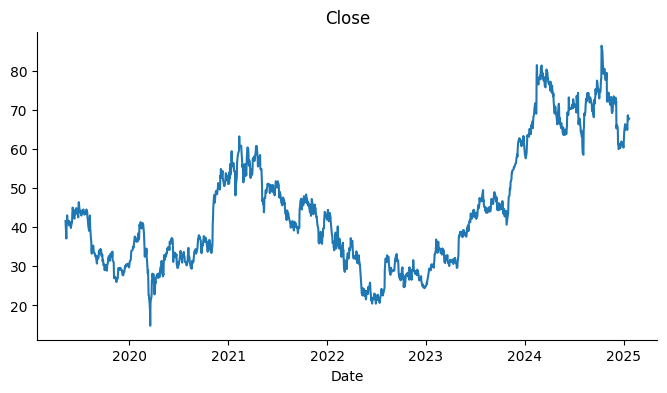

In [16]:
#plot time-series

from matplotlib import pyplot as plt
df3['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

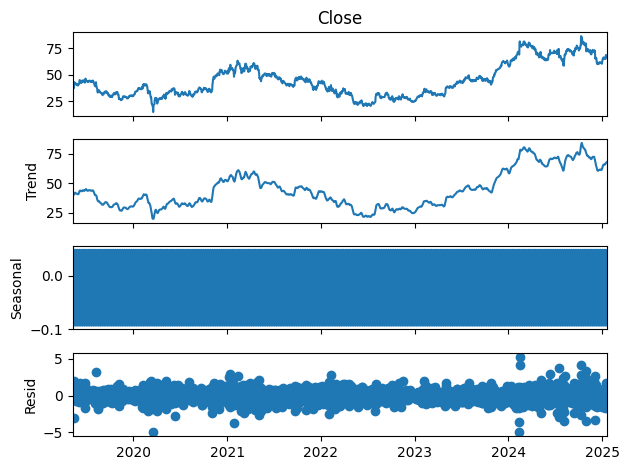

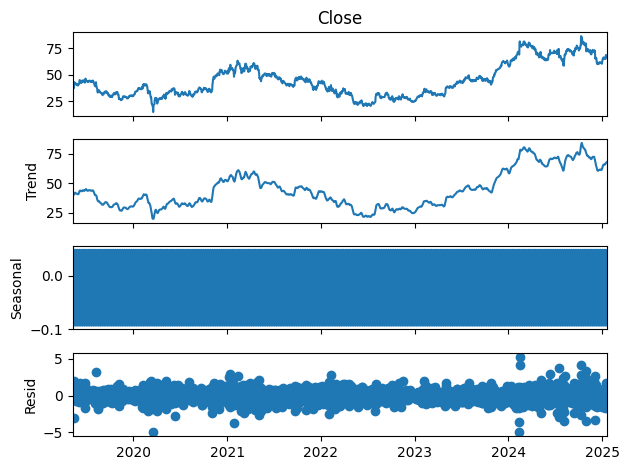

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

df3 = df3.asfreq('D')  # Set frequency to daily ('D')
df3.interpolate(method='linear', inplace=True)
df3 = df3[~df3.index.duplicated(keep='first')] #remove duplicate rows
res = seasonal_decompose(df3['Close'])
res.plot()

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df3['Close'] = scaler.fit_transform(df3[['Close']])

In [24]:
df3.Close

,Close
Date,
2019-05-10,0.374021
2019-05-11,0.353188
2019-05-12,0.332355
2019-05-13,0.311521
2019-05-14,0.351510
...,...
2025-01-17,0.734340
2025-01-18,0.735738
2025-01-19,0.737136


In [25]:
train = df3.iloc[:1029]
test = df3.iloc[1029:]

train.shape, test.shape

((1029, 1), (1055, 1))

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import numpy as np

# Reshape
time_steps = 60  # Number of past time steps to look at
X_train = []
y_train = []
for i in range(time_steps, len(train)):
    X_train.append(train['Close'].values[i-time_steps:i])  # 60 time steps
    y_train.append(train['Close'].values[i])  # Next day's price

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # Reshape for LSTM

# Define LSTM Model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - loss: 0.0474
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 0.0027
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.0013
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0011
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0011
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0010
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 195ms/step - loss: 0.0010
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - loss: 9.8082e-04
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 9.4906e-04
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0010
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - loss: 9.0207e-04
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 9.0627e-04
Epoch 13/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 8.8592e-04
Epoch 14/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 7.7885e-04
Epoch 15/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 

In [34]:
# Number of past time steps to look at (same as train)
time_steps = 60

X_test = []
y_test = []

# Use the test dataset to create sequences
for i in range(time_steps, len(test)):
    X_test.append(test['Close'].values[i-time_steps:i])  # 60 time steps
    y_test.append(test['Close'].values[i])  # Next day's price

# Convert lists to NumPy arrays
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape for LSTM input (samples, time steps, features)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(f"X_test shape: {X_test.shape}")  # Should match X_train's shape
print(f"y_test shape: {y_test.shape}")  # Should be (samples,)

X_test shape: (995, 60, 1)
y_test shape: (995,)


In [35]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 2.2511e-04
Test Loss: 0.00031541878706775606


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step


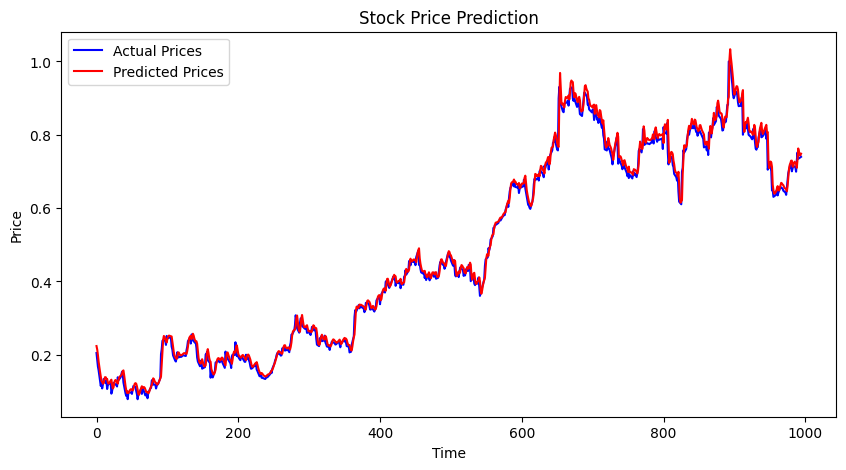

In [36]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [37]:
import pandas as pd

# Create DataFrame for comparison
df_results = pd.DataFrame({
    'Actual Price': y_test.flatten(),  # Flatten to 1D
    'Predicted Price': y_pred.flatten()  # Flatten to 1D
})

# Display comparison as a table
print(df_results)

     Actual Price  Predicted Price
0        0.204838         0.223864
1        0.185682         0.214492
2        0.167925         0.199196
3        0.157299         0.180991
4        0.143223         0.166237
..            ...              ...
990      0.734340         0.762660
991      0.735738         0.754757
992      0.737136         0.744286
993      0.738535         0.744111
994      0.739933         0.748499

[995 rows x 2 columns]
